In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

<h1> Data Ingestion </h1>

Briefly explain the data. What kind of data and the direction of the project

Downloading the Data from UCI

In [3]:
!curl -s -o diabetes.zip "https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip"

Extract the required file from the zip folder

In [4]:
with zipfile.ZipFile("diabetes.zip", 'r') as zip_ref:
    zip_ref.extractall()

<h1> Data Exploration </h1>

<h2> Reading Diabetic Data </h2>

In [3]:
raw_data = pd.read_csv("diabetic_data.csv")

In [4]:
raw_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
print(
    f"Dimensions of the data: {raw_data.shape[0]} rows and {raw_data.shape[1]} columns")

Dimensions of the data: 101766 rows and 50 columns


<strong>It is observed that a few of the columns have the value "?". We need to replace them with na and then check for null values</strong>

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From the above, we observe that:
1. There are no missing values since they are encoded as "?" as stated above
2. The data types are either object or int64

In [7]:
raw_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<h2>Reading the IDS mapping document</h2>

In [8]:
ids_admit_type_id_mapping = pd.read_csv("IDS_mapping.csv", nrows=8)

In [9]:
ids_admit_type_id_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


Renaming columns for better readability

In [10]:
ids_admit_type_id_mapping.rename(
    columns={'description': 'admission_type_id_description'}, inplace=True)

In [11]:
ids_admit_type_id_mapping['admission_type_id_description'].replace(
    np.NaN, "Type Removed", inplace=True)

In [12]:
ids_admit_type_id_mapping

,admission_type_id,admission_type_id_description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,Type Removed
6,7,Trauma Center
7,8,Not Mapped


In [13]:
raw_data.shape

(101766, 50)

<h3> Merging Dataframes to get Admission_type_id </h3>

In [14]:
data = pd.merge(raw_data, ids_admit_type_id_mapping,
                how='left', on='admission_type_id')

In [15]:
data.shape

(101766, 51)

In [16]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Type Removed
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency


<h3> Getting Admission_source_id_mapping </h3>

In [17]:
ids_admission_source_id_mapping = pd.read_csv(
    "IDS_mapping.csv", nrows=25, skiprows=42)

In [18]:
ids_admission_source_id_mapping

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [19]:
ids_admission_source_id_mapping.rename(
    columns={'description': 'admission_source_id_description'}, inplace=True)

In [20]:
ids_admission_source_id_mapping['admission_source_id_description'].replace(
    np.NaN, "Source Removed", inplace=True)

In [21]:
ids_admission_source_id_mapping

,admission_source_id,admission_source_id_description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


<h3> Merging Dataframes to get Admission_source_id </h3>

In [22]:
data_df = pd.merge(data, ids_admission_source_id_mapping,
                   how='left', on='admission_source_id')

In [23]:
data_df.shape

(101766, 52)

In [24]:
data_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description,admission_source_id_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Type Removed,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Emergency Room


<h1> Data Cleaning and Preprocessing </h1>

In [25]:
# Replacing the "?" with na's
data_df.replace("?", np.NaN, inplace=True)

Checking for nulls again

In [26]:
data_df.isna().sum()

encounter_id                           0
patient_nbr                            0
race                                2273
gender                                 0
age                                    0
weight                             98569
admission_type_id                      0
discharge_disposition_id               0
admission_source_id                    0
time_in_hospital                       0
payer_code                         40256
medical_specialty                  49949
num_lab_procedures                     0
num_procedures                         0
num_medications                        0
number_outpatient                      0
number_emergency                       0
number_inpatient                       0
diag_1                                21
diag_2                               358
diag_3                              1423
number_diagnoses                       0
max_glu_serum                          0
A1Cresult                              0
metformin       

As we can see a few of the features like race, weight, payer_code, medical_speciality, diag_1, diag_2 and diag_3 have nulls 

We can remove weight and payer_code since they aren't relevant to the outcome and they have too many nulls

In [27]:
data_df.drop(['weight', 'payer_code'], axis=1, inplace=True)

In [28]:
data_df.isnull().sum()

encounter_id                           0
patient_nbr                            0
race                                2273
gender                                 0
age                                    0
admission_type_id                      0
discharge_disposition_id               0
admission_source_id                    0
time_in_hospital                       0
medical_specialty                  49949
num_lab_procedures                     0
num_procedures                         0
num_medications                        0
number_outpatient                      0
number_emergency                       0
number_inpatient                       0
diag_1                                21
diag_2                               358
diag_3                              1423
number_diagnoses                       0
max_glu_serum                          0
A1Cresult                              0
metformin                              0
repaglinide                            0
nateglinide     

<h1> Feature Engineering </h1>

C:\Users\tgt55\AppData\Local\Temp\ipykernel_25984\2758106875.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')


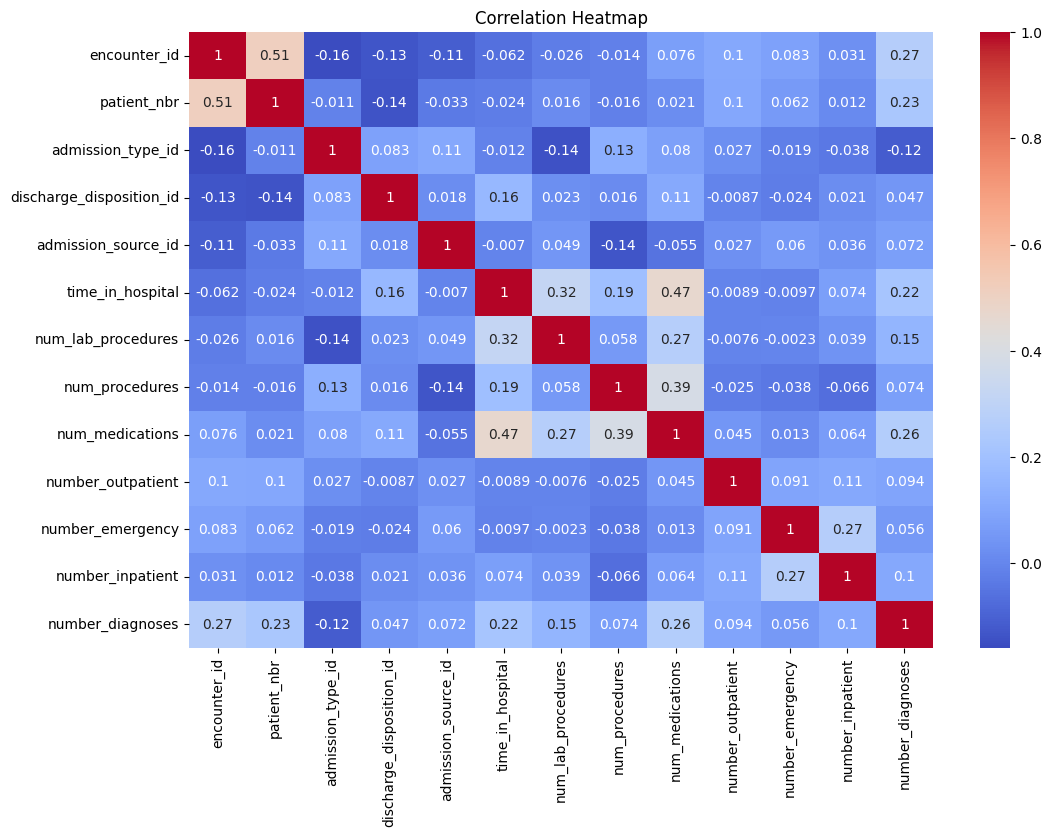

In [31]:
# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

<hr>

<h1> Analytical Questions </h1>

<h2> a. Questions solved using functions you define (such as lambda-map functions): </h2>

<h3> 1. Create a function that calculates the average number of outpatient visits for patients with a specific diagnosis ('diag_1', 'diag_2', or 'diag_3').
</h3>

In [32]:
def average_outpatient_visits_by_diagnosis(data, diagnosis_code):
    # Filter the data to include only rows with the specific diagnosis code in any of the 'diag_1', 'diag_2', or 'diag_3' columns
    filtered_data = data[(data['diag_1'] == diagnosis_code) | (
        data['diag_2'] == diagnosis_code) | (data['diag_3'] == diagnosis_code)]

    # Calculate the total number of outpatient visits for patients with the specific diagnosis
    total_outpatient_visits = filtered_data['number_outpatient'].sum()

    # Calculate the total number of patients with the specific diagnosis
    total_patients_with_diagnosis = len(filtered_data)

    # Calculate the average number of outpatient visits for patients with the specific diagnosis
    average_outpatient_visits = total_outpatient_visits / total_patients_with_diagnosis

    return average_outpatient_visits

In [33]:
diag_code = '428'
avg_outpatient_visits = average_outpatient_visits_by_diagnosis(
    data_df, diag_code)
print(
    f"The average number of outpatient visits for patients with diagnosis_code {diag_code} is {avg_outpatient_visits:.2f}")

The average number of outpatient visits for patients with diagnosis_code 428 is 0.44


<h3>2. Write a function to calculate the average number of outpatients of male and female patients separately</h3>

In [34]:
def average_age_by_gender(data):

    # Group the data by 'gender' and calculate the mean of the 'age' column for each group
    grouped_data = round(data.groupby('gender')['number_outpatient'].mean(), 2)

    # Convert the grouped data to a dictionary for easy access to average age by gender
    average_age_by_gender = grouped_data.to_dict()

    return average_age_by_gender

In [35]:
print("The average number of outpatients of male and females")
avg_age_by_gender = average_age_by_gender(data_df)
print(avg_age_by_gender)

The average number of outpatients of male and females
{'Female': 0.38, 'Male': 0.35, 'Unknown/Invalid': 0.0}


<h3> 3. Create a function to identify patients who had a specific medication combination, such as 'rosiglitazone' and 'acarbose'.
</h3>

In [36]:
def find_patients_with_medication_combination(data, medication1, medication2):

    # Filter the data to include only rows where both medications are present
    patients_with_combination = data[(data[medication1] == 'Steady') & (
        data[medication2] == 'Steady')]

    return patients_with_combination

In [37]:
med1 = 'rosiglitazone'
med2 = 'acarbose'
medication_combination = find_patients_with_medication_combination(
    data_df, med1, med2)
print(f"\nPatients with the specific combination of {med1} and {med2} are:\n")
medication_combination.head(5)


Patients with the specific combination of rosiglitazone and acarbose are:



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description,admission_source_id_description
4921,26722938,97414263,Caucasian,Female,[70-80),1,1,7,3,Family/GeneralPractice,55,0,16,0,0,0,486,250,729,6,None,>8,Steady,No,No,No,No,No,Steady,No,No,No,Steady,Steady,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Emergency Room
7659,35904786,112309047,Caucasian,Female,[40-50),3,1,1,4,Surgery-General,31,2,19,0,0,0,552,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,Steady,Steady,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Elective,Physician Referral
7829,36352068,56482542,Caucasian,Female,[60-70),2,1,2,1,NaN,44,4,16,1,0,1,440,496,414,7,None,None,No,No,No,No,No,No,No,No,No,No,Steady,Steady,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Urgent,Clinic Referral
9657,41767032,8794098,Caucasian,Female,[80-90),1,18,7,4,NaN,49,0,11,0,0,0,410,425,496,9,None,None,No,No,No,No,No,No,No,Steady,No,No,Steady,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,Emergency,Emergency Room
11858,48767220,4143807,Caucasian,Female,[40-50),1,18,7,9,NaN,70,0,22,0,0,0,250.93,70,599,8,None,>8,Steady,No,No,No,No,No,No,Steady,No,Steady,Steady,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,Emergency,Emergency Room


<h3> 4. Design a function to calculate the percentage of patients who were readmitted within 30 days of their previous hospitalization.</h3>

In [38]:
def percentage_readmitted_within_30_days(data):

    # Filter the data to include only patients who were readmitted within 30 days
    readmitted_within_30_days = data[data['readmitted'] == '<30']

    # Calculate the total number of patients readmitted within 30 days
    total_readmitted_within_30_days = len(readmitted_within_30_days)

    # Calculate the total number of patients in the dataset
    total_patients = len(data)

    # Calculate the percentage of patients readmitted within 30 days
    percentage_readmitted = (
        total_readmitted_within_30_days / total_patients) * 100

    return percentage_readmitted

In [39]:
percentage_readmitted = percentage_readmitted_within_30_days(data_df)
print(
    f"The percentage of patients who were readmitted within 30 days of their previous hospitalization: {percentage_readmitted:.2f}%")

The percentage of patients who were readmitted within 30 days of their previous hospitalization: 11.16%


<h3> 5. Create a function that calculates the average number of lab procedures per patient using the 'num_lab_procedures' column.</h3>

In [40]:
def average_lab_procedures_per_patient(data):

    # Calculate the total number of lab procedures for all patients
    total_lab_procedures = data['num_lab_procedures'].sum()

    # Calculate the total number of patients
    total_patients = len(data)

    # Calculate the average number of lab procedures per patient
    average_lab_procedures = total_lab_procedures / total_patients

    return average_lab_procedures

In [41]:
avg_lab_procedures = average_lab_procedures_per_patient(data_df)
print(
    f"Average number of lab procedures per patient is {avg_lab_procedures:.2f}")

Average number of lab procedures per patient is 43.10


<hr>

<h2> b. Questions utilizing Pandas and NumPy</h2>

<h3> 6. Find the median length of stay for diabetic patients. </h3>

In [42]:
print(
    f"The median length of stay for diabetic patients are {np.median(data_df['time_in_hospital'])} days")

The median length of stay for diabetic patients are 4.0 days


<h3> 7. Calculate the percentage of male and female patients in the dataset. </h3>

In [43]:
gender_counts = data_df['gender'].value_counts()

In [44]:
total_patients = len(data_df)

In [45]:
male_patients = (gender_counts['Male'] / total_patients) * 100

In [46]:
female_patients = (gender_counts['Female'] / total_patients) * 100

In [47]:
print(f"The percentage of Male patients: {male_patients: .2f} %")
print(f"The percentage of Female patients: {female_patients: .2f} %")

The percentage of Male patients:  46.24 %
The percentage of Female patients:  53.76 %


<h3> 8. Determine the most common race/ethnicity among diabetic patients </h3>

In [48]:
print(f"The most common race/enthnicity among diabetic patients is {data_df['race'].value_counts().idxmax()} with \
the number of patients being : {data_df['race'].value_counts()[0]}")

The most common race/enthnicity among diabetic patients is Caucasian with the number of patients being : 76099


<h3> 9. Create a new column that categorizes patients based on the number of medications they are taking.</h3>
Create categories like 'Low', 'Medium', and 'High' based on the 'num_medications' column.

In [49]:
min_meds = data_df['num_medications'].min()
print("The minimum number of medications a patient has:", min_meds)

The minimum number of medications a patient has: 1


In [50]:
max_meds = data_df['num_medications'].max()
print("The maximum number of medications a patient has:", max_meds)

The maximum number of medications a patient has: 81


In [51]:
print(
    f"The range of number of medications a patient could have is between {min_meds} and {max_meds}")

The range of number of medications a patient could have is between 1 and 81


In [52]:
num_bins = 3
# Calculate bin width
bin_width = (max_meds - min_meds) // 3

# Create the bins based on the minimum, maximum, and width of each bin
bins = [min_meds-1 + i * bin_width for i in range(num_bins)]
bins.append(max_meds)

In [53]:
bins

[0, 26, 52, 81]

In [54]:
# Create the column and assign the labels to the bins
data_df['medication_category'] = pd.cut(
    x=data_df['num_medications'], bins=bins, labels=['low', 'medium', 'high'])

In [55]:
data_df[['num_medications', 'medication_category']]

,num_medications,medication_category
0,1,low
1,18,low
2,13,low
3,16,low
4,8,low
...,...,...
101761,16,low
101762,18,low
101763,9,low
101764,21,low


<h3> 10. Find the average number of lab procedures for patients who underwent surgery and those who didn't</h3>

In [56]:
# Patients who had surgeries done
patients_with_surgeries = data_df[data_df['num_procedures'] > 0]

In [57]:
# Patients who didn't get any surgeries
patients_without_surgeries = data_df[data_df['num_procedures'] == 0]

In [58]:
print(f"The average number of lab procedures for patients who underwent surgery is \
{patients_with_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who underwent surgery is 43.24


In [59]:
print(f"The average number of lab procedures for patients who didn't have surgery is \
{patients_without_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who didn't have surgery is 42.93


<hr> 

<h2> c. Questions with visualizations using Matplotlib and Seaborn </h2>

<h3> 11. Visualize the distribution of age groups using a pie chart </h3>

In [60]:
age_dist = data_df['age'].value_counts()
age_dist

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

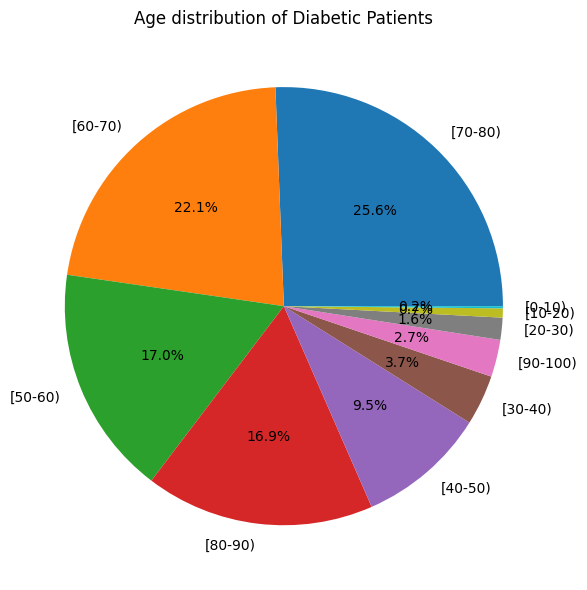

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%')
ax.set_title("Age distribution of Diabetic Patients")
plt.tight_layout();

<h3> 12. Create a bar plot to show the count of patients in each age group</h3>

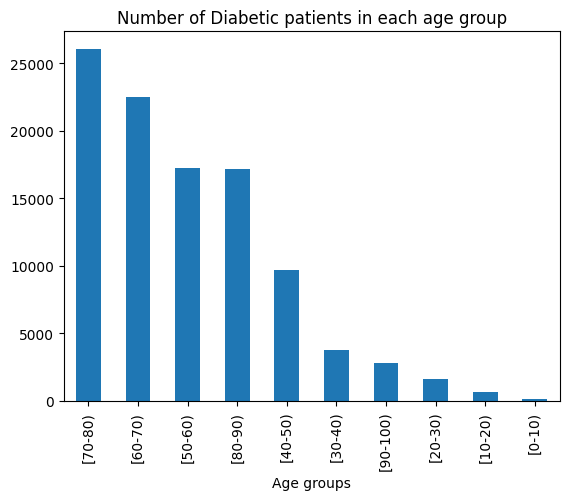

In [62]:
age_dist.plot(kind='bar')
plt.xlabel("Age groups")
plt.title("Number of Diabetic patients in each age group");

<h3>13. Compare the time spent in the hospital for different admission types </h3>

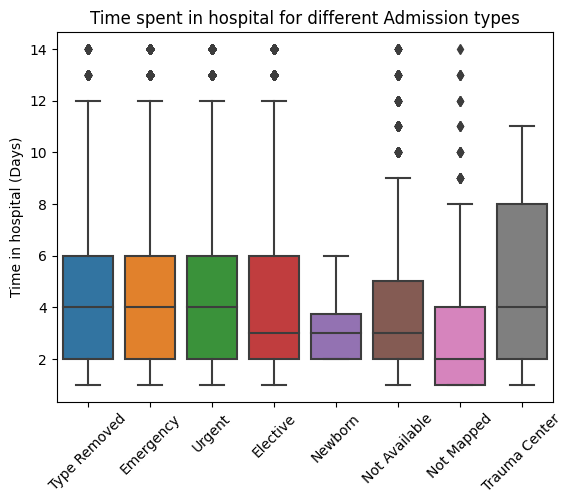

In [63]:
sns.boxplot(data_df, x='admission_type_id_description', y='time_in_hospital')
plt.title("Time spent in hospital for different Admission types")
plt.ylabel("Time in hospital (Days)")
plt.xlabel("")
plt.xticks(rotation=45);

<h3> 14. Compare the length of stay for different races</h3>

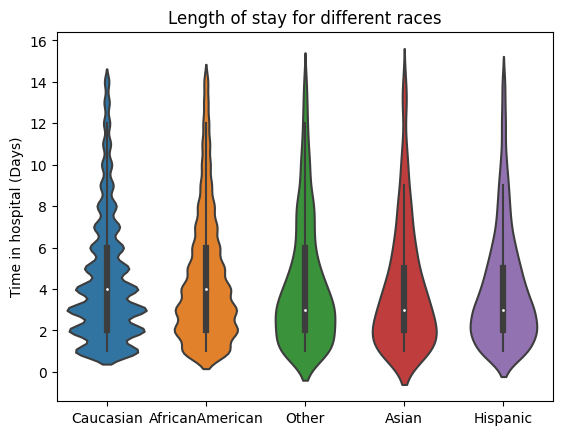

In [64]:
sns.violinplot(data=data_df, x="race", y="time_in_hospital")
plt.title("Length of stay for different races")
plt.xlabel("")
plt.ylabel("Time in hospital (Days)");

<h3> 15. Create a histogram to visualize the distribution of the number of diagnoses per patient</h3>

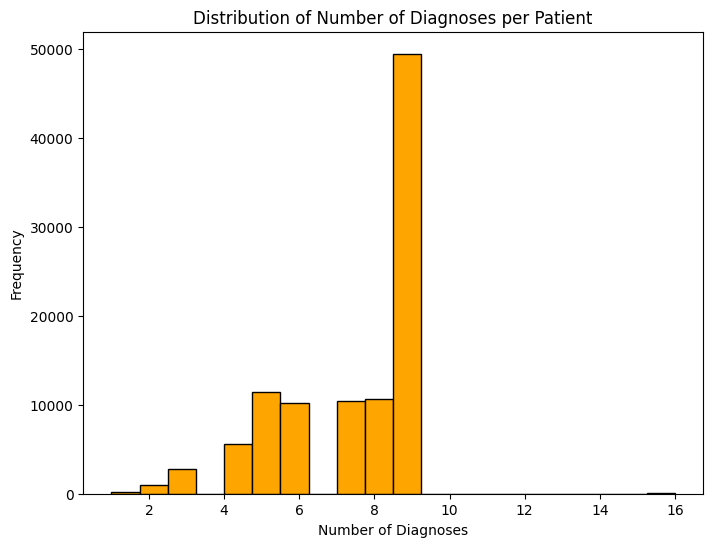

In [65]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(data_df['number_diagnoses'], bins=20,
         color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Diagnoses per Patient');

<h2>d. Questions revealing valuable insights from the dataset</h2>

<h3> 16. Explore the readmission rates for patients with different A1C test results to identify any correlations.</h3>

In [66]:
data_df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

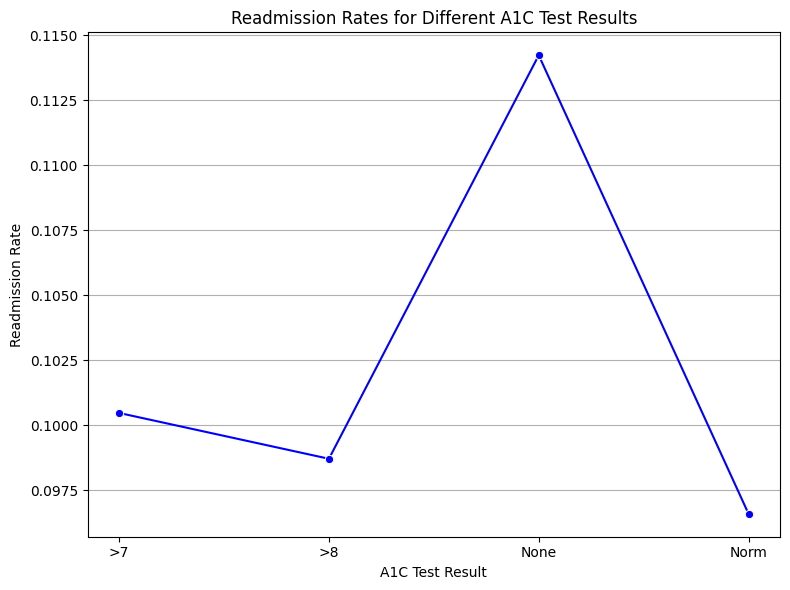

In [39]:
# Group the data by 'A1Cresult' and calculate the readmission rate for each group
a1c_grouped_data = data_df.groupby('A1Cresult')['readmitted'].value_counts(normalize=True).unstack()
readmission_rates = a1c_grouped_data['<30']

# Create a line plot to visualize the readmission rates for each A1C result
plt.figure(figsize=(8, 6))
sns.lineplot(x=readmission_rates.index, y=readmission_rates.values, data=readmission_rates, marker='o', color='blue')

# Adding labels and title
plt.xlabel('A1C Test Result')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rates for Different A1C Test Results')
plt.grid(axis='y')
plt.tight_layout()


<h3> 17. Analyze the average number of procedures for patients who were readmitted within 30 days compared to those who were not.</h3>

In [68]:
# Calculate the average number of procedures for patients who were readmitted within 30 days
readmitted_within_30_days = data_df[data_df['readmitted'] == '<30']
avg_procedures_for_readmitted = readmitted_within_30_days['num_procedures'].mean(
)

In [69]:
# Calculate the average number of procedures for patients who were not readmitted within 30 days
not_readmitted_within_30_days = data_df[data_df['readmitted'] != '<30']
avg_procedures_for_not_readmitted = not_readmitted_within_30_days['num_procedures'].mean(
)

In [70]:
print(
    f"The average number of procedures for patients who were readmitted within 30 days is {avg_procedures_for_readmitted:.2f}")
print(
    f"The average number of procedures for patients who were not readmittied is {avg_procedures_for_not_readmitted:.2f}")

The average number of procedures for patients who were readmitted within 30 days is 1.28
The average number of procedures for patients who were not readmittied is 1.35


<h3> 18. Determine the most common medical specialty for patients who had a length of stay greater than the median length of stay. </h3>

In [71]:
# Calculate the median length of stay
median_length_of_stay = data_df['time_in_hospital'].median()

# Filter the data to include only patients with a length of stay greater than the median
long_stay_patients = data_df[data_df['time_in_hospital']
                             > median_length_of_stay]

# Determine the most common medical specialty for these patients
most_common_specialty = long_stay_patients['medical_specialty'].mode(
).values[0]

print(f"The most common medical specialty for patients who had a length of stay greater than the median length of stay:",
      most_common_specialty)

The most common medical specialty for patients who had a length of stay greater than the median length of stay: InternalMedicine


<h3> 19. What are the most common medications prescribed for patients who had a length of stay greater than the median length of stay?</h3>

In [72]:
medication_columns = ['metformin',
                      'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                      'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                      'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                      'tolazamide', 'examide', 'citoglipton', 'insulin']

# Check the medication columns for Steady, Up or Down this means the medication was used
medications = long_stay_patients[medication_columns].apply(
    lambda x: x.eq('Steady') | x.eq('Up') | x.eq('Down'))

In [73]:
# Get the counts of all the medications
medication_counts = medications.apply(lambda x: x.sum())

In [74]:
# Get the top 5 medications
most_common_medications = medication_counts.nlargest(5)

In [75]:
print("The most common medications prescribed for patients who had a length of stay greater than the median length of stay are:")
most_common_medications

The most common medications prescribed for patients who had a length of stay greater than the median length of stay are:


insulin         22694
metformin        7438
glipizide        5041
glyburide        4373
pioglitazone     2843
dtype: int64

<h3>20. Are there any patterns in the admission sources for patients who were readmitted within 30 days? Do certain admission sources have a higher readmission rate than others?
</h3>

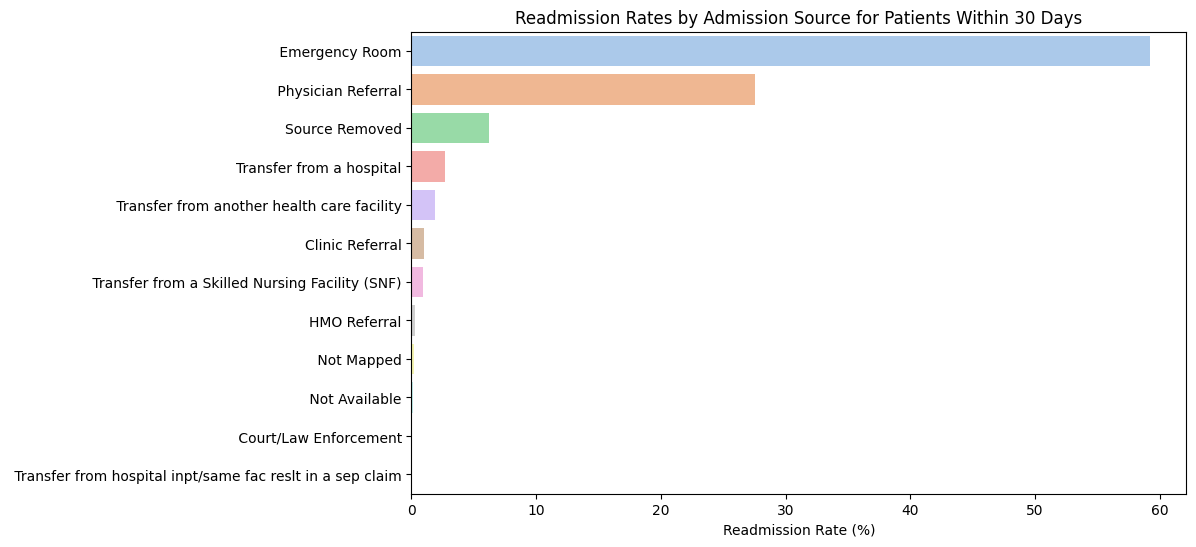

In [76]:
# Calculate the readmission rate for each admission source
readmission_rates = readmitted_within_30_days['admission_source_id_description'].value_counts(
    normalize=True) * 100

# Sort the readmission rates in descending order to identify the highest rates
sorted_readmission_rates = readmission_rates.sort_values(ascending=False)

# Create a bar plot to visualize the readmission rates for each admission source
plt.figure(figsize=(10, 6))
sns.barplot(y=sorted_readmission_rates.index,
            x=sorted_readmission_rates.values, palette='pastel')

# Adding labels and title
plt.ylabel('')
plt.xlabel('Readmission Rate (%)')
plt.title('Readmission Rates by Admission Source for Patients Within 30 Days');

<hr>

<h3> 21. Calculate the percentage of patients who had 'number_inpatient' greater than zero and also had 'number_outpatient' greater than zero.</h3>

In [77]:
inpatient_outpatient_df = data_df[(data_df['number_inpatient'] > 0) & (
    data_df['number_outpatient'] > 0)]

In [78]:
print(
    f"The percentage of patients who had 'number_inpatient' and 'number_outpatient' greater than 0 are: {(inpatient_outpatient_df.shape[0] / data_df.shape[0]) * 100:.2f} %")

The percentage of patients who had 'number_inpatient' and 'number_outpatient' greater than 0 are: 8.05 %


<h3>22. Determine the highest & lowest 5 average number of lab procedures for medical specialties</h3>

In [31]:
med_spec_grouped = data_df.groupby('medical_specialty')[
    'num_lab_procedures'].mean()

In [35]:
print("The 5 medical specialities with the lowest average number of lab procedures are:")
round(med_spec_grouped.sort_values(ascending=True).head(5),2)

The 5 medical specialities with the lowest average number of lab procedures are:


medical_specialty
Dermatology     2.00
Obstetrics     14.89
Gynecology     18.62
Pathology      20.94
Neurology      26.51
Name: num_lab_procedures, dtype: float64

In [36]:
print("The 5 medical specialities with the highest average number of lab procedures are:")
round(med_spec_grouped.sort_values(ascending=False).head(5),2)

The 5 medical specialities with the highest average number of lab procedures are:


medical_specialty
Psychiatry-Addictive              73.00
DCPTEAM                           61.67
Resident                          56.50
Pediatrics-Hematology-Oncology    53.25
Proctology                        53.00
Name: num_lab_procedures, dtype: float64

<h3> 23. Visualize patients from each race/ethnicity group</h3>

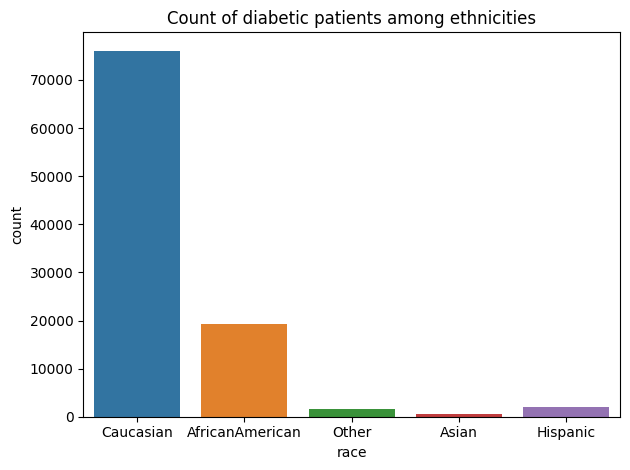

In [81]:
sns.countplot(data=data_df, x='race')
plt.title("Count of diabetic patients among ethnicities")
plt.tight_layout();

<h3>24. Visualize using distributionplot the number of medications prescribed</h3>


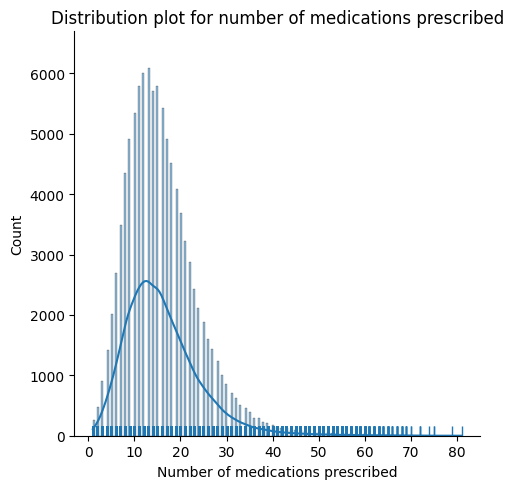

In [82]:
sns.displot(data=data_df, x='num_medications',  kde=True, rug=True)
plt.title("Distribution plot for number of medications prescribed")
plt.xlabel("Number of medications prescribed")
plt.tight_layout();

<h3> 25. Find the average time in the hospital for patients on number of diagnoses</h3>

In [83]:
average_time_by_diagnoses = data_df.groupby('number_diagnoses')['time_in_hospital'].mean()

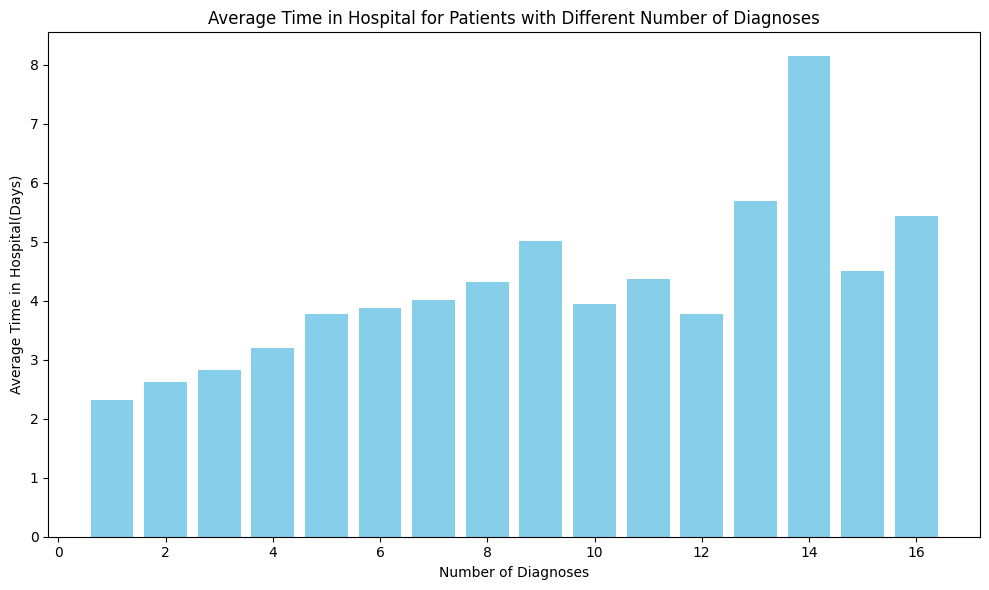

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(average_time_by_diagnoses.index, average_time_by_diagnoses.values, color='skyblue')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Average Time in Hospital(Days)')
plt.title('Average Time in Hospital for Patients with Different Number of Diagnoses')
plt.tight_layout()